### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Importing CSV data type using pandas and Viewing the first five rows of the data

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.shape

(145460, 23)

### Printing out some information about the data which includes the index data type and columns, non-null counts and memory usage.

#### There are 145,460 observations with 23 columns or variables. Among the 23 columns, 16 are float data types while 7 are object data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Converting RainToday and RainTomorrow to numeric

In [5]:
RainToday_num = {'No': 0, 'Yes': 1}

df['RainToday'] = df['RainToday'].map(RainToday_num)


RainTomorrow_num = {'No': 0, 'Yes': 1}

df['RainTomorrow'] = df['RainTomorrow'].map(RainTomorrow_num)


df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


### After converting RainToday and RainTomorrow to numeric, they are both float

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Printing out the summary statistics of the numerical variables

#### The count clearly shows that there are missing values as the count differes across all the columns. This is a confirmation from the $df.info$ command

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199.000000,142193.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,0.224193,0.224181
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,0.417051,0.417043
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,0.000000,0.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,0.000000,0.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,1.000000,1.000000


### Checking the number of missing values in for each column

Evaporation has the highest number of no-missing values followed by Cloud3pm while Date and Location have no missing observations or values.

In [8]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

<AxesSubplot:>

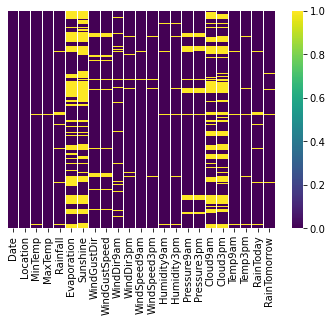

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

The yellow parts of the heatmap shows the features that have missing observations and the intensity of the missing values. A look at the variables Evaporation, Sunshine, Cloud9am, Cloud3pm shows that the missing values are very concentrated over several periods. Hence, the missing values are not missing by random. To avoid any false estimation through replacing the missing values with the mean or the most occuring value, these varaibles are dropped from the data frame.


In [10]:
df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Date', 'Location'], axis=1, inplace=True)

In [11]:
df.sample(15)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
121382,8.0,20.3,0.2,26.0,9.0,9.0,77.0,38.0,1021.9,1017.4,12.9,20.1,0.0,0.0
57137,9.8,12.9,22.4,33.0,13.0,17.0,98.0,81.0,1018.3,1018.6,10.2,10.7,1.0,0.0
121588,16.0,30.1,0.0,46.0,20.0,24.0,37.0,20.0,1019.2,1015.1,20.0,29.0,0.0,0.0
74938,1.3,17.4,0.0,20.0,6.0,4.0,96.0,41.0,1021.8,1018.2,5.7,16.8,0.0,0.0
86898,9.6,23.7,0.0,19.0,7.0,2.0,53.0,36.0,1024.3,1020.9,16.6,23.2,0.0,0.0
59150,6.9,20.4,0.0,31.0,11.0,13.0,70.0,55.0,1018.5,1014.3,11.8,17.7,0.0,0.0
106839,3.6,15.5,0.0,28.0,19.0,9.0,63.0,31.0,1031.5,1027.3,8.3,14.7,0.0,0.0
15295,8.5,16.4,7.2,NaN,0.0,NaN,92.0,NaN,NaN,NaN,12.2,NaN,1.0,1.0
75393,16.0,19.6,0.0,41.0,20.0,22.0,70.0,58.0,1025.2,1024.4,16.7,18.4,0.0,0.0
24252,18.2,20.3,1.4,26.0,2.0,15.0,96.0,66.0,NaN,NaN,19.4,19.2,1.0,0.0


### Filling in the missing data with the median value

In [12]:
# filling missing values 
# with mode column values
df.fillna(df.median(), inplace=True)
df.sample(20)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1180,6.2,21.0,0.0,24.0,2.0,13.0,85.0,46.0,1022.4,1020.5,10.2,19.8,0.0,0.0
91127,11.6,25.4,0.0,19.0,7.0,13.0,64.0,53.0,1016.8,1014.5,18.6,22.9,0.0,0.0
74754,14.5,20.5,8.2,76.0,39.0,50.0,71.0,54.0,999.0,999.0,15.9,17.6,1.0,0.0
21097,11.9,18.0,2.8,33.0,11.0,22.0,86.0,76.0,1027.6,1024.2,14.9,16.7,1.0,0.0
77062,12.5,20.5,0.0,35.0,17.0,24.0,68.0,66.0,1022.9,1020.4,16.8,18.9,0.0,0.0
23565,16.4,24.6,0.0,31.0,15.0,17.0,55.0,57.0,1017.5,1015.7,21.8,22.3,0.0,0.0
19744,13.2,19.2,0.0,30.0,13.0,9.0,75.0,73.0,1018.2,1016.1,16.4,17.8,0.0,0.0
124961,12.0,22.6,0.0,39.0,13.0,19.0,70.0,33.0,1017.6,1015.2,16.7,23.2,0.0,0.0
19114,14.6,20.4,0.8,39.0,24.0,20.0,68.0,63.0,1023.5,1021.8,18.1,19.1,0.0,0.0
2893,16.4,42.5,0.0,72.0,2.0,33.0,46.0,9.0,1009.7,1004.7,23.5,40.9,0.0,0.0


In [13]:
df.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [14]:
df_n = df.dropna()

In [15]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145460 entries, 0 to 145459
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        145460 non-null  float64
 1   MaxTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   WindGustSpeed  145460 non-null  float64
 4   WindSpeed9am   145460 non-null  float64
 5   WindSpeed3pm   145460 non-null  float64
 6   Humidity9am    145460 non-null  float64
 7   Humidity3pm    145460 non-null  float64
 8   Pressure9am    145460 non-null  float64
 9   Pressure3pm    145460 non-null  float64
 10  Temp9am        145460 non-null  float64
 11  Temp3pm        145460 non-null  float64
 12  RainToday      145460 non-null  float64
 13  RainTomorrow   145460 non-null  float64
dtypes: float64(14)
memory usage: 16.6 MB


In [16]:
df_n.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

## Exploratory Data Aanalysis

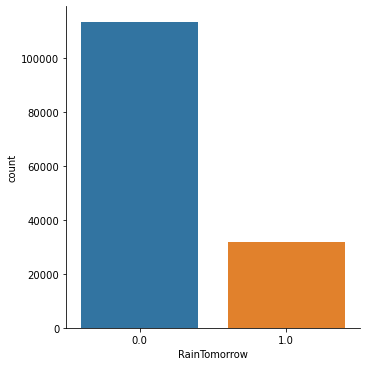

In [17]:
sns.catplot(x= 'RainTomorrow', data = df_n, kind='count')

#### Target column, 'RainTomorrow', is highly imbalance

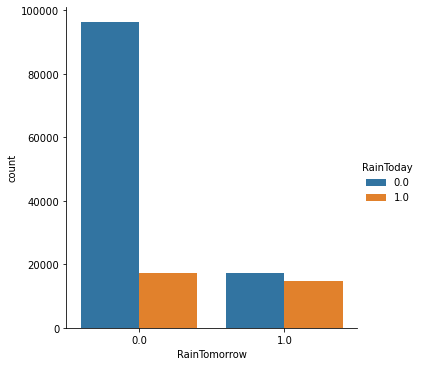

In [18]:
sns.catplot(x='RainTomorrow', hue = 'RainToday', data=df_n, kind='count')

In [19]:
pd.crosstab(df_n['RainTomorrow'], df_n['RainToday']).sum
table = pd.crosstab(df_n['RainTomorrow'], df_n['RainToday'])
print(table)

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square statistics %0.3f p_value %0.3f' % (chi2, p))

RainToday       0.0    1.0
RainTomorrow              
0.0           96300  17283
1.0           17280  14597
Chi-square statistics 13595.740 p_value 0.000


The chi square test shows that the possibility of raining today and raining tomorrow are highly dependent as the p-value is significant.

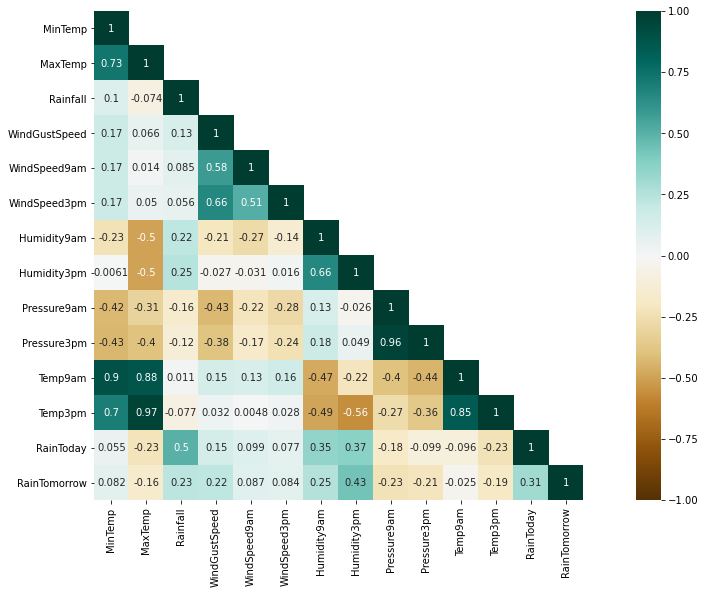

In [20]:
# Visualization of correlations (heatmap)
mask = np.triu(df_n.corr(), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(df.corr(), annot=True, vmax=1, vmin = -1, square=True, cmap='BrBG', mask=mask);

### Splitting Data into Training and Test Sets

In [22]:
y = df_n.RainTomorrow.astype(int)
x = df_n.drop(['RainTomorrow'], axis=1)

In [23]:
x.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0


In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int32

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)

In [26]:
df_n.groupby('RainTomorrow').size()

RainTomorrow
0.0    113583
1.0     31877
dtype: int64

### Logistic Modelling

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
classification_report(y_test, predictions)

In [ ]:
cm = confusion_matrix(y_test, predictions)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

### Predicting the accuracy score

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

print(f"The accuracy of the predicted model is {accuracy:.2%}")